# Capstone Project - ML model to predict car accidents severity (Week 2)
### Applied Data Science Capstone by Pablo César López

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

The present analysis aims to generate a Machine Learning model to predict the severity of car accidents in Seattle based on some features registered and related to said accidents. Various algorithms will be analyzed and it will be determined which has the best fit to the provided test data.

## Data <a name="data"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as pltlab
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline


Downloading data set from ibm cloud and loading it into a pandas dataframe

In [2]:
#!wget https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
df=pd.read_csv("Data-Collisions.csv",dtype={'ST_COLCODE': np.object})

In [3]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


There are 38 columns and 194673 rows. The label is SEVERITYCODE and this is the value that we want to predict. The other columns are features that we'll use to train ML models. Next step shows the name of columns:

Next, we get information about columns for checking the data types:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

Next, we convert into datetime INCDATE and INCDTTM columns:

In [5]:
df['INCDATE'] = pd.to_datetime(df['INCDATE'])
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'])
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [6]:
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [7]:
df['SEVERITYCODE.1'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE.1, dtype: int64

We observe that SEVERITYCODE column is repeated and we proceed to drop the duplicated:

In [8]:
df.drop(columns="SEVERITYCODE.1",inplace=True)

In [9]:
df.shape

(194673, 37)

# Identify missing values
### Evaluating for Missing Data

In [10]:
missing_data = df.isnull()
missing_data.head(5)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,...,False,False,True,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,...,False,False,True,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,True,True,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False


"True" stands for missing value, while "False" stands for not missing value.

## Count missing values in each column
We check the number of missing values in each column. As mentioned above, "True" represents a missing value, "False" means the value is present in the dataset:

In [11]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

X
False    189339
True       5334
Name: X, dtype: int64

Y
False    189339
True       5334
Name: Y, dtype: int64

OBJECTID
False    194673
Name: OBJECTID, dtype: int64

INCKEY
False    194673
Name: INCKEY, dtype: int64

COLDETKEY
False    194673
Name: COLDETKEY, dtype: int64

REPORTNO
False    194673
Name: REPORTNO, dtype: int64

STATUS
False    194673
Name: STATUS, dtype: int64

ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64

INTKEY
True     129603
False     65070
Name: INTKEY, dtype: int64

LOCATION
False    191996
True       2677
Name: LOCATION, dtype: int64

EXCEPTRSNCODE
True     109862
False     84811
Name: EXCEPTRSNCODE, dtype: int64

EXCEPTRSNDESC
True     189035
False      5638
Name: EXCEPTRSNDESC, dtype: int64

SEVERITYDESC
False    194673
Name: SEVERITYDESC, dtype: int64

COLLISIONTYPE
False    189769
True       4904
Name: COLLISIONTYPE, dtype: int64

PERSONCOUNT
False    194673
Name: PERSO

### Checking value ranges in each column

In [12]:
for column in df.columns.values.tolist():
    print(column)
    print (df[column].value_counts())
    print("")  

SEVERITYCODE
1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

X
-122.332653    265
-122.344896    254
-122.328079    252
-122.344997    239
-122.299160    231
              ... 
-122.322768      1
-122.288680      1
-122.405699      1
-122.323578      1
-122.343898      1
Name: X, Length: 23563, dtype: int64

Y
47.708655    265
47.717173    254
47.604161    252
47.725036    239
47.579673    231
            ... 
47.556705      1
47.709101      1
47.513899      1
47.565438      1
47.563521      1
Name: Y, Length: 23839, dtype: int64

OBJECTID
2047     1
1194     1
58550    1
64693    1
62644    1
        ..
96890    1
90745    1
92792    1
70263    1
2049     1
Name: OBJECTID, Length: 194673, dtype: int64

INCKEY
266238    1
81549     1
104088    1
126615    1
124566    1
         ..
164613    1
176899    1
178946    1
172801    1
295445    1
Name: INCKEY, Length: 194673, dtype: int64

COLDETKEY
266238    1
122129    1
111900    1
101659    1
99610     1
         ..
137750    1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 37 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   SEVERITYCODE    194673 non-null  int64              
 1   X               189339 non-null  float64            
 2   Y               189339 non-null  float64            
 3   OBJECTID        194673 non-null  int64              
 4   INCKEY          194673 non-null  int64              
 5   COLDETKEY       194673 non-null  int64              
 6   REPORTNO        194673 non-null  object             
 7   STATUS          194673 non-null  object             
 8   ADDRTYPE        192747 non-null  object             
 9   INTKEY          65070 non-null   float64            
 10  LOCATION        191996 non-null  object             
 11  EXCEPTRSNCODE   84811 non-null   object             
 12  EXCEPTRSNDESC   5638 non-null    object             
 13  SEVERITYDESC  

Now, we choose the columns which will be the features and discard irrelevant columns

01) SEVERITYCODE	---> Label <br>
02) X --------------> feature: drop null's <br>
03) Y -----------------> feature: drop null's	(2) <br>
04) OBJECTID	---> drop column <br>
05) INCKEY 	---> drop column <br>
06) COLDETKEY	---> drop column <br>
07) REPORTNO	---> drop column <br>
08) STATUS		---> drop column <br>
09) ADDRTYPE	---> feature: hot encoding, drop null's <br>
<ul><ul><ul><ul><ul><ul>Block...........126926 <br>
                        Intersection.....65070 <br>
                        Alley..............751 <br></ul></ul></ul></ul></ul></ul>
10) INTKEY 	---> drop column <br>
11) LOCATION	---> drop column <br>
12) EXCEPTRSNCODE	---> drop column <br>
13) EXCEPTRSNDESC	---> drop column <br>
14) SEVERITYDESC	---> drop column <br>
15) COLLISIONTYPE	---> feature: hot encoding, drop null's & 'Other'   <br>
<ul><ul><ul><ul><ul><ul>Parked Car..............47987 <br>
                        Angles..................34674 <br>
                        Rear Ended..............34090 <br>
                        Other...................23703 <br>
                        Sideswipe...............18609 <br>
                        Left Turn...............13703 <br>
                        Pedestrian...............6608 <br>
                        Cycles...................5415 <br>
                        Right Turn...............2956 <br>
                        Head On..................2024 <br></ul></ul></ul></ul></ul></ul>
16) PERSONCOUNT	---> feature: check quality <br>
17) PEDCOUNT	---> feature: check quality <br>
18) PEDCYLCOUNT	---> feature: check quality <br>
19) VEHCOUNT	---> feature: check quality <br>
20) INCDATE -------> drop column <br>
21) INCDTTM -------> feature: extract day of the week and month, drop column <br>
<ul><ul><ul><ul><ul><ul>INCDTTM_DAYOFWEEK -> calculated from INCDTTM <br>
                        INCDTTM_DAY_MTH ---> calculated from INCDTTM <br></ul></ul></ul></ul></ul></ul>
22) JUNCTIONTYPE 	---> feature, hot encoding, drop "Unknown" <br>
<ul><ul><ul><ul><ul><ul>Mid-Block (but intersection related).................22790 <br>
                        Driveway Junction....................................10671 <br>
                        At Intersection (but not related to intersection).....2098 <br>
                        Ramp Junction..........................................166 <br>
                        Unknown..................................................9 <br></ul></ul></ul></ul></ul></ul>
23) SDOT_COLCODE	---> drop column <br>
24) SDOT_COLDESC	---> drop column because It's descriptive <br>
25) INATTENTIONIND	---> feature: check quality, convert to numeric <br> 
26) UNDERINFL	-------> feature: check quality, convert to numeric <br> 
27) WEATHER	-----------> hot encoding <br>
<ul><ul><ul><ul><ul><ul>Clear.......................111135 <br>
                        Raining......................33145 <br>
                        Overcast.....................27714 <br>
                        Unknown......................15091 <br>
                        Snowing........................907 <br>
                        Other..........................832 <br>
                        Fog/Smog/Smoke.................569 <br>
                        Sleet/Hail/Freezing Rain.......113 <br>
                        Blowing Sand/Dirt...............56 <br>
                        Severe Crosswind................25 <br>
                        Partly Cloudy....................5 <br></ul></ul></ul></ul></ul></ul>
28) ROADCOND	-------> feature: hot enconding, drop "Other" and "Unknown" <br>
<ul><ul><ul><ul><ul><ul>Dry               124510 <br>
                        Wet                47474 <br>
                        Unknown            15078 <br>
                        Ice                 1209 <br>
                        Snow/Slush          1004 <br>
                        Other                132 <br>
                        Standing Water       115 <br>
                        Sand/Mud/Dirt         75 <br>
                        Oil                   64 <br></ul></ul></ul></ul></ul></ul>
29) LIGHTCOND	-------> feature: hot encoding, drop "Other" and "Unknown" <br>
<ul><ul><ul><ul><ul><ul>Daylight....................116137 <br>
                        Dark - Street Lights On......48507 <br>
                        Unknown......................13473 <br>
                        Dusk..........................5902 <br>
                        Dawn..........................2502 <br>
                        Dark - No Street Lights.......1537 <br>
                        Dark - Street Lights Off......1199 <br>
                        Other..........................235 <br>
                        Dark - Unknown Lighting.........11 <br></ul></ul></ul></ul></ul></ul>
30) PEDROWNOTGRNT	---> drop column <br>
31) SDOTCOLNUM --------> drop column <br>
32) SPEEDING	-------> feature, convert null-0 / Y-1 <br>
33) ST_COLCODE	-------> drop column <br>
34) ST_COLDESC	-------> drop column because It's descriptive <br>
35) SEGLANEKEY --------> drop column <br>
36) CROSSWALKKEY ------> drop column <br>
37) HITPARKEDCAR ------> feature: check quality <br>

    

Now we choose features from columns:

In [33]:
df_selection = df[['SEVERITYCODE','X','Y','ADDRTYPE','COLLISIONTYPE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT', 'VEHCOUNT', 'INCDTTM',
                   'JUNCTIONTYPE', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING', 'HITPARKEDCAR']]

Now, we create INCDT_MTH y INCDT_DAYOFWEEK:

In [34]:
INCDT_DAYOFWEEK=df.INCDTTM.dt.dayofweek
INCDT_MTH=df.INCDTTM.dt.month
df_selection['INCDT_DAYOFWEEK']=INCDT_DAYOFWEEK
df_selection['INCDT_MTH']=INCDT_MTH
df_selection.drop(['INCDTTM'],axis=1,inplace=True)
df_selection.index

<ipython-input-34-cbb7c0ab5cda>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selection['INCDT_DAYOFWEEK']=INCDT_DAYOFWEEK
<ipython-input-34-cbb7c0ab5cda>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selection['INCDT_MTH']=INCDT_MTH


RangeIndex(start=0, stop=194673, step=1)

Cleanning Data Selection

In [35]:
datafilter = (df_selection.LIGHTCOND == 'Other') | (df_selection.LIGHTCOND == 'Unknown') | \
                      (df_selection.LIGHTCOND == 'Dark - Unknown Lighting') |\
                      (df_selection.ROADCOND == 'Other') | (df_selection.ROADCOND == 'Unknown') | \
                      (df_selection.WEATHER == 'Other') | (df_selection.WEATHER == 'Unknown') | \
                      (df_selection.JUNCTIONTYPE == 'Other') | (df_selection.JUNCTIONTYPE == 'Unknown') | \
                      (df_selection.COLLISIONTYPE == 'Other')
df_selection = df_selection.drop(df_selection[datafilter].index)

In [36]:
df_selection["LIGHTCOND"] = df_selection["LIGHTCOND"].replace("Dark - Street Lights Off", "Dark - No Street Lights")
df_selection["UNDERINFL"] = df_selection["UNDERINFL"].replace("N", 0)
df_selection["UNDERINFL"] = df_selection["UNDERINFL"].replace("0", 0)
df_selection["UNDERINFL"] = df_selection["UNDERINFL"].replace("1", 1)
df_selection["UNDERINFL"] = df_selection["UNDERINFL"].replace("Y", 1)
df_selection["INATTENTIONIND"] = df_selection["INATTENTIONIND"].replace("Y", 1)
df_selection["SPEEDING"] = df_selection["SPEEDING"].replace("Y", 1)

In [37]:
df_selection['UNDERINFL'] = df_selection['UNDERINFL'].fillna(0)
df_selection['INATTENTIONIND'] = df_selection['INATTENTIONIND'].fillna(0)
df_selection['SPEEDING'] = df_selection['SPEEDING'].fillna(0)

# Check the columns which has NaN values
df_selection.isna().sum()

SEVERITYCODE          0
X                  2609
Y                  2609
ADDRTYPE            686
COLLISIONTYPE      4898
PERSONCOUNT           0
PEDCOUNT              0
PEDCYLCOUNT           0
VEHCOUNT              0
JUNCTIONTYPE       2143
INATTENTIONIND        0
UNDERINFL             0
WEATHER            5009
ROADCOND           4977
LIGHTCOND          5081
SPEEDING              0
HITPARKEDCAR          0
INCDT_DAYOFWEEK       0
INCDT_MTH             0
dtype: int64

### Dropping partial rows:

In [38]:
df_selection.dropna(inplace=True)

In [39]:
df_selection.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143741 entries, 0 to 194672
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SEVERITYCODE     143741 non-null  int64  
 1   X                143741 non-null  float64
 2   Y                143741 non-null  float64
 3   ADDRTYPE         143741 non-null  object 
 4   COLLISIONTYPE    143741 non-null  object 
 5   PERSONCOUNT      143741 non-null  int64  
 6   PEDCOUNT         143741 non-null  int64  
 7   PEDCYLCOUNT      143741 non-null  int64  
 8   VEHCOUNT         143741 non-null  int64  
 9   JUNCTIONTYPE     143741 non-null  object 
 10  INATTENTIONIND   143741 non-null  float64
 11  UNDERINFL        143741 non-null  float64
 12  WEATHER          143741 non-null  object 
 13  ROADCOND         143741 non-null  object 
 14  LIGHTCOND        143741 non-null  object 
 15  SPEEDING         143741 non-null  float64
 16  HITPARKEDCAR     143741 non-null  obje

### Balancing Data

<AxesSubplot:xlabel='SEVERITYCODE', ylabel='count'>

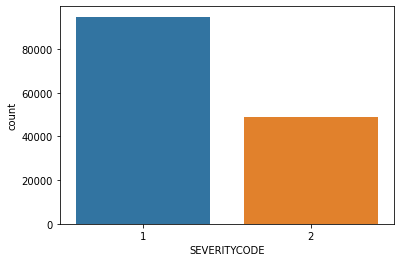

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="SEVERITYCODE", data=df_selection)

Not severe collitions:  48923
    Severe collitions:  48923


<AxesSubplot:xlabel='SEVERITYCODE', ylabel='count'>

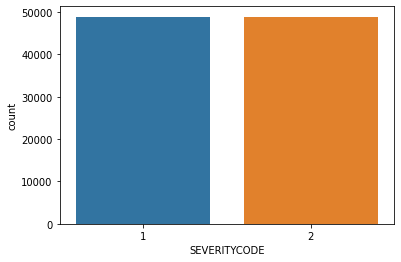

In [41]:
from imblearn.under_sampling import RandomUnderSampler

X = df_selection[['X', 'Y', 'ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT',
       'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'JUNCTIONTYPE', 'INATTENTIONIND',
       'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING',
       'HITPARKEDCAR', 'INCDT_DAYOFWEEK', 'INCDT_MTH']]
y = df_selection[['SEVERITYCODE']]

rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)
df_selection = X_resampled
df_selection['SEVERITYCODE'] = y_resampled

severeCols = df_selection[df_selection.SEVERITYCODE == 2]
notSevereCols = df_selection[df_selection.SEVERITYCODE == 1]

print("Not severe collitions: ", len(severeCols))
print("    Severe collitions: ", len(notSevereCols))

sns.countplot(x="SEVERITYCODE", data=df_selection)

In [42]:
df_selection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97846 entries, 0 to 97845
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   X                97846 non-null  float64
 1   Y                97846 non-null  float64
 2   ADDRTYPE         97846 non-null  object 
 3   COLLISIONTYPE    97846 non-null  object 
 4   PERSONCOUNT      97846 non-null  int64  
 5   PEDCOUNT         97846 non-null  int64  
 6   PEDCYLCOUNT      97846 non-null  int64  
 7   VEHCOUNT         97846 non-null  int64  
 8   JUNCTIONTYPE     97846 non-null  object 
 9   INATTENTIONIND   97846 non-null  float64
 10  UNDERINFL        97846 non-null  float64
 11  WEATHER          97846 non-null  object 
 12  ROADCOND         97846 non-null  object 
 13  LIGHTCOND        97846 non-null  object 
 14  SPEEDING         97846 non-null  float64
 15  HITPARKEDCAR     97846 non-null  object 
 16  INCDT_DAYOFWEEK  97846 non-null  int64  
 17  INCDT_MTH   

### Checking features:

<AxesSubplot:xlabel='count', ylabel='INATTENTIONIND'>

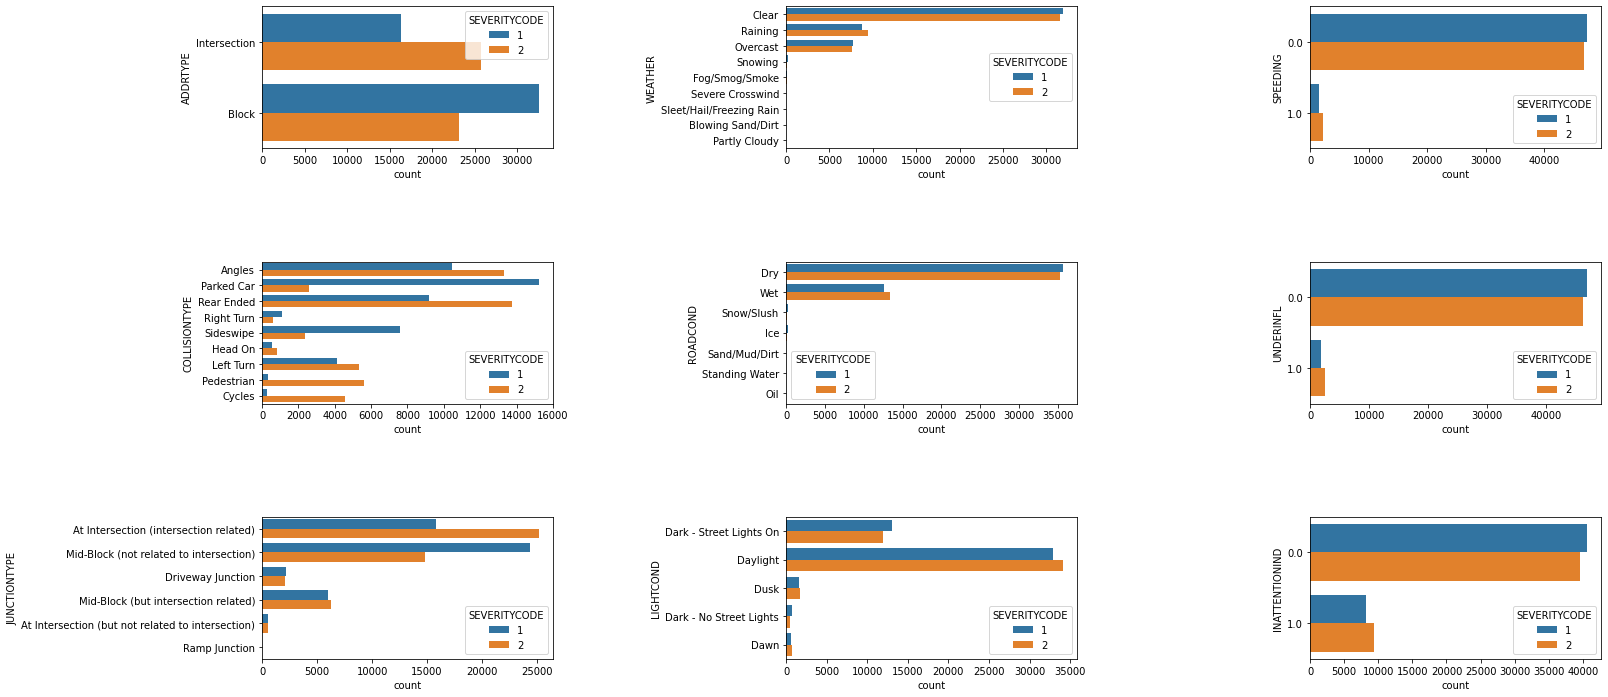

In [25]:
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(24,12))
plt.subplots_adjust(hspace = 0.8, wspace=0.8)
sns.countplot(y="ADDRTYPE", hue="SEVERITYCODE", data=df_selection, ax=axs[0, 0])
sns.countplot(y="COLLISIONTYPE", hue="SEVERITYCODE", data=df_selection, ax=axs[1, 0])
sns.countplot(y="JUNCTIONTYPE", hue="SEVERITYCODE", data=df_selection, ax=axs[2, 0])
sns.countplot(y="WEATHER", hue="SEVERITYCODE", data=df_selection, ax=axs[0, 1])
sns.countplot(y="ROADCOND", hue="SEVERITYCODE", data=df_selection, ax=axs[1, 1])
sns.countplot(y="LIGHTCOND", hue="SEVERITYCODE", data=df_selection, ax=axs[2, 1])
sns.countplot(y="SPEEDING", hue="SEVERITYCODE", data=df_selection, ax=axs[0, 2])
sns.countplot(y="UNDERINFL", hue="SEVERITYCODE", data=df_selection, ax=axs[1, 2])
sns.countplot(y="INATTENTIONIND", hue="SEVERITYCODE", data=df_selection, ax=axs[2, 2])

Feature ADDRTYPE: 0.023567
Feature COLLISIONTYPE: 0.125591
Feature PEDCOUNT: 0.033341
Feature PEDCYLCOUNT: 0.026181
Feature JUNCTIONTYPE: 0.026742
Feature INATTENTIONIND: 0.000000
Feature UNDERINFL: 0.001810
Feature WEATHER: 0.000820
Feature ROADCOND: 0.005430
Feature LIGHTCOND: 0.005312
Feature SPEEDING: 0.003311
Feature HITPARKEDCAR: 0.007000
Feature INCDT_DAYOFWEEK: 0.000000
Feature INCDT_MTH: 0.001439


<AxesSubplot:>

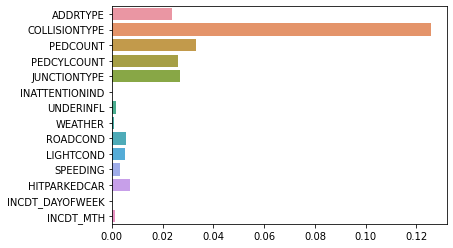

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

# prepare input data
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc
 
# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc
 
# feature selection
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

def calc_entropy(X, y, n):
    scores = []
    result = np.zeros(len(X.columns))
    
    for i in range(n):
        # split into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
        # prepare input data
        X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
        # prepare output data
        y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
        # feature selection
        X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)
        # what are scores for the features
        result = fs.scores_ + result
        
    return result / n

X = df_selection.drop(columns=['X','Y', 'PERSONCOUNT', 'VEHCOUNT', 'SEVERITYCODE'])
X = X.astype(str)
y = df_selection['SEVERITYCODE']

# Change the iteration number if you want to average the results
iterations = 1

result = calc_entropy(X, y, iterations)

for i in range(len(result)):
    print('Feature %s: %f' % (X.columns[i], result[i]))
# Plot the scores

sns.barplot(y=X.columns, x=result)
#plt.savefig('fig/feature_extraction.png',dpi=300, bbox_inches = "tight")

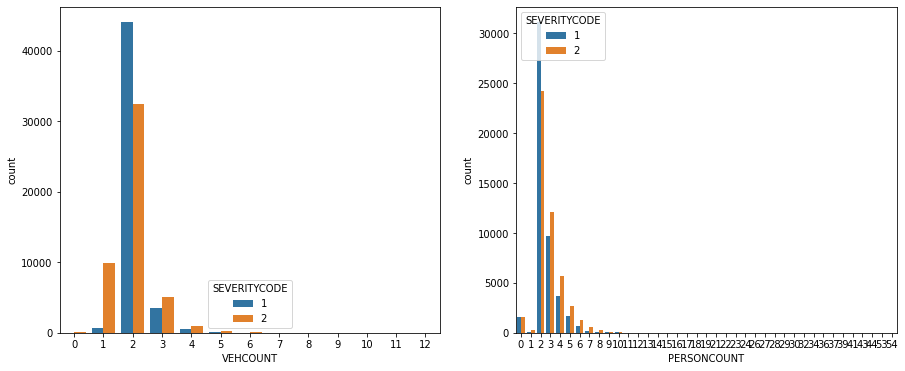

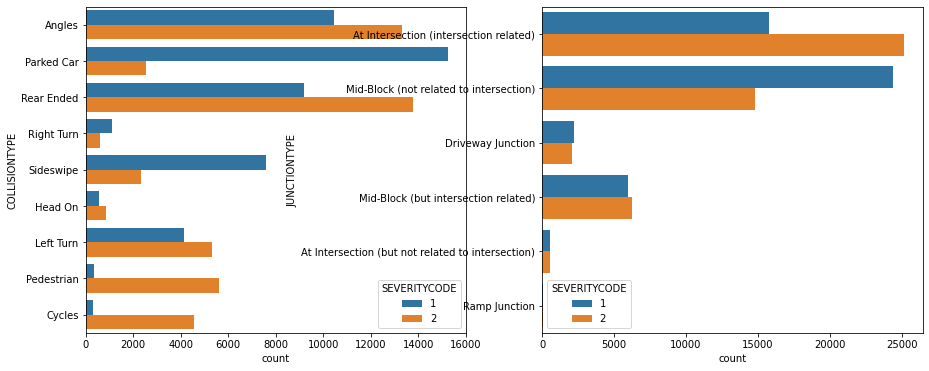

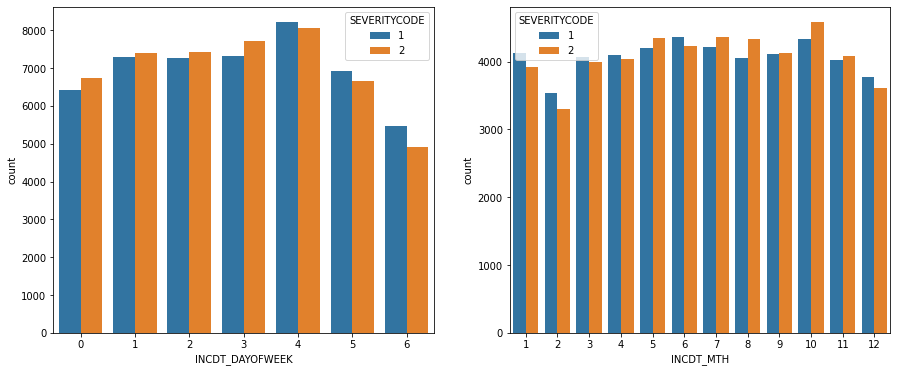

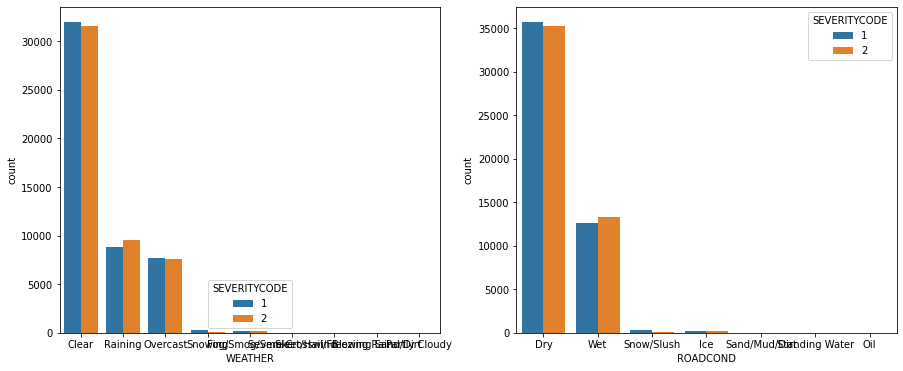

In [44]:
fig, axs = plt.subplots(ncols=2, figsize=(15,6))
sns.countplot(x="VEHCOUNT", hue="SEVERITYCODE", data=df_selection, ax=axs[0])
sns.countplot(x="PERSONCOUNT", hue="SEVERITYCODE", data=df_selection, ax=axs[1])
fig, axs = plt.subplots(ncols=2, figsize=(15,6))
sns.countplot(y="COLLISIONTYPE", hue="SEVERITYCODE", data=df_selection,ax=axs[0])
#plt.savefig('fig/collisions.png',dpi=300, bbox_inches = "tight")
sns.countplot(y="JUNCTIONTYPE", hue="SEVERITYCODE", data=df_selection,ax=axs[1])
#plt.savefig('fig/junction.png',dpi=300, bbox_inches = "tight")
fig, axs = plt.subplots(ncols=2, figsize=(15,6))
sns.countplot(x="INCDT_DAYOFWEEK", hue="SEVERITYCODE", data=df_selection, ax=axs[0])
sns.countplot(x="INCDT_MTH", hue="SEVERITYCODE", data=df_selection, ax=axs[1])

fig, axs = plt.subplots(ncols=2, figsize=(15,6))
sns.countplot(x="WEATHER", hue="SEVERITYCODE", data=df_selection, ax=axs[0])
sns.countplot(x="ROADCOND", hue="SEVERITYCODE", data=df_selection, ax=axs[1])
fig.get_axes()[1].legend(loc='upper right', title='SEVERITYCODE') 
#fig.savefig('fig/veh_person_count.png',dpi=300, bbox_inches = "tight")

#### Renaming SEVERITYCODE to 0,1

In [45]:
df_selection["SEVERITYCODE"] = df_selection["SEVERITYCODE"].replace(1, 0)
df_selection["SEVERITYCODE"] = df_selection["SEVERITYCODE"].replace(2, 1)

#### One hot encoding

In [46]:
features = pd.concat([pd.get_dummies(df_selection['WEATHER']), 
                     pd.get_dummies(df_selection['ROADCOND']),
                     pd.get_dummies(df_selection['LIGHTCOND'])], axis=1)
features.head()

,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Dry,...,Oil,Sand/Mud/Dirt,Snow/Slush,Standing Water,Wet,Dark - No Street Lights,Dark - Street Lights On,Dawn,Daylight,Dusk
0,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


##### Defining features and labels matrix-vector

In [47]:
X = features
y = df_selection['SEVERITYCODE'].values

##### Normalize Data

In [48]:
# Normalizing and splitting data in training and test datasets
from sklearn import preprocessing

X = preprocessing.StandardScaler().fit(X).transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)



Train set: (78276, 21) (78276,)
Test set: (19570, 21) (19570,)


## Methodology <a name="methodology"></a>

Now that we have cleaned data and prepare datasets for training ML models, we proceed to evaluate the following algorithms: <br>
1) K Nearest Neighbor(KNN) <br>
2) Decision Tree <br>
3) Support Vector Machine <br>
4) Logistic Regression <br> <br>

After training models with these algoritms, we'll test them with test-dataset

### K Nearest Neighbor(KNN)

In [49]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [52]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([0, 0, 0, 1, 0])

In [53]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5006515407021309
Test set Accuracy:  0.4944302503832397


In [54]:
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.51021972, 0.49821155, 0.49693408, 0.49443025, 0.49417476,
       0.49565662, 0.51001533, 0.4963209 , 0.49356157, 0.49494124,
       0.51083291, 0.51006643, 0.51149719, 0.49851814])

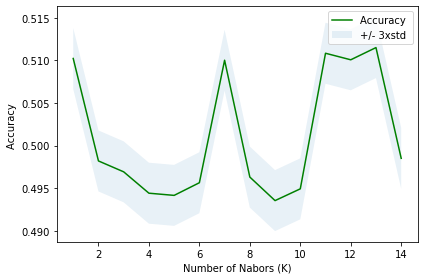

In [55]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [56]:
k2 = 13
#Train Model and Predict  
neigh2 = KNeighborsClassifier(n_neighbors = k2).fit(X_train,y_train)
neigh2

KNeighborsClassifier(n_neighbors=13)

In [57]:
yhatKNN = neigh2.predict(X_test)
yhatKNN[0:5]

array([0, 1, 1, 1, 1])

In [58]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh2.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhatKNN))

Train set Accuracy:  0.5123792733404875
Test set Accuracy:  0.5114971895758814


In [59]:
from sklearn.metrics import f1_score
f1_score(y_test, yhatKNN, average='weighted') 

0.49936159148300513

### Decision Tree

In [60]:
from sklearn.model_selection import train_test_split
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [62]:
DTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [63]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [64]:
DTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [66]:
predTree = DTree.predict(X_test)

In [67]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.5192130812468063


### Support Vector Machine

In [69]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

In [70]:
from sklearn import svm
SVM_CL = svm.SVC(kernel='rbf')
SVM_CL.fit(X_train, y_train) 

SVC()

In [71]:
yhatsvm = SVM_CL.predict(X_test)
yhatsvm [0:5]

array([0, 1, 1, 1, 0])

In [72]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [73]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [75]:
cnf_matrix = confusion_matrix(y_test, yhatsvm, labels=[0, 1])
np.set_printoptions(precision=2)

              precision    recall  f1-score   support

           0       0.53      0.24      0.33      9693
           1       0.52      0.79      0.62      9877

    accuracy                           0.52     19570
   macro avg       0.52      0.52      0.48     19570
weighted avg       0.52      0.52      0.48     19570

Confusion matrix, without normalization
[[2355 7338]
 [2066 7811]]


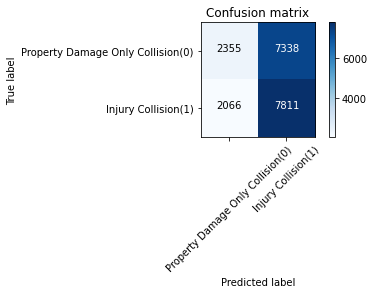

In [76]:
print (classification_report(y_test, yhatsvm))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Property Damage Only Collision(0)','Injury Collision(1)'],normalize= False,  title='Confusion matrix')

In [77]:
from sklearn.metrics import f1_score
f1_score(y_test, yhatsvm, average='weighted') 

0.48033675817545746

In [79]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhatsvm)

0.45373221028173105

### Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [81]:
yhatLR = LR.predict(X_test)
yhatLR

array([0, 1, 1, ..., 0, 1, 0])

In [82]:
yhatLR_prob = LR.predict_proba(X_test)
#yhatLR_prob

In [83]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhatLR)

0.4346209213051823

In [85]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cmLR, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cmLR = cmLR.astype('float') / cmLR.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cmLR)

    plt.imshow(cmLR, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cmLR.max() / 2.
    for i, j in itertools.product(range(cmLR.shape[0]), range(cmLR.shape[1])):
        plt.text(j, i, format(cmLR[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cmLR[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhatLR, labels=[0, 1]))

[[2898 6795]
 [2631 7246]]


Confusion matrix, without normalization
[[2898 6795]
 [2631 7246]]


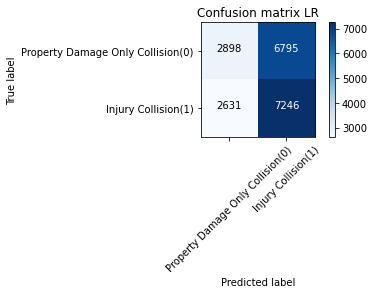

In [86]:
# Compute confusion matrix
cnf_matrixLR = confusion_matrix(y_test, yhatLR, labels=[0,1])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrixLR, classes=['Property Damage Only Collision(0)','Injury Collision(1)'],normalize= False,  title='Confusion matrix LR')

In [87]:
print (classification_report(y_test, yhatLR))

              precision    recall  f1-score   support

           0       0.52      0.30      0.38      9693
           1       0.52      0.73      0.61      9877

    accuracy                           0.52     19570
   macro avg       0.52      0.52      0.49     19570
weighted avg       0.52      0.52      0.49     19570



In [88]:
from sklearn.metrics import log_loss
log_loss(y_test, yhatLR_prob)

0.6919753401418938

## Results and Discussion <a name="results"></a>

In [90]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

Now we can evaluate the models to compare each other:

In [92]:
yhatKNN_test = neigh2.predict(X_test)
yhatDT_test  = DTree.predict(X_test)
yhatSVM_test = SVM_CL.predict(X_test)
yhatLR_prob_test = LR.predict_proba(X_test)
yhatLR_test  = LR.predict(X_test)

from sklearn.metrics import jaccard_score
JKNN = jaccard_score(y_test, yhatKNN_test)
JDT  = jaccard_score(y_test, yhatDT_test)
JSVM = jaccard_score(y_test, yhatSVM_test)
JLR  = jaccard_score(y_test, yhatLR_test)


from sklearn.metrics import f1_score
f1KNN = f1_score(y_test, yhatKNN_test, average='weighted')
f1DT  = f1_score(y_test, yhatDT_test, average='weighted')
f1SVM = f1_score(y_test, yhatSVM_test, average='weighted')
f1LR  = f1_score(y_test, yhatLR_test, average='weighted')

from sklearn.metrics import log_loss
loglossLR_test = log_loss(y_test, yhatLR_prob_test)


data_report = [['KNN',JKNN ,f1KNN ,'NA'], ['Decision Tree', JDT, f1DT,'NA' ], ['SVM', JSVM, f1SVM,'NA' ], ['LogisticRegression', JLR, f1LR, loglossLR_test]] 

df_report = pd.DataFrame(data_report, columns = ['Algorithm', 'Jaccard', 'F1-score', 'LogLoss']) 

df_report

,Algorithm,Jaccard,F1-score,LogLoss
0,KNN,0.407463,0.499362,NA
1,Decision Tree,0.462895,0.469825,NA
2,SVM,0.453732,0.480337,NA
3,LogisticRegression,0.434621,0.494392,0.691975


# Conclusion <a name="conclusion"></a>

After evaluate distinct algorithms, Decision Tree was the algorithm with better accuracy to predict labes in base of selected features for training ML models. Althogh, feature engineering will be required to increase precision.